In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [2]:
telcom = pd.read_csv("Telco-Customer-Churn.csv")
#first few rows
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## <a id='1.1'>1.1. Data overview</a>

In [3]:
print ("Rows     : " ,telcom.shape[0])
print ("Columns  : " ,telcom.shape[1])
print ("\nFeatures : \n" ,telcom.columns.tolist())
print ("\nMissing values :  ", telcom.isnull().sum().values.sum())
print ("\nUnique values :  \n",telcom.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


# <a id='2'>2. Data Manipulation</a>

In [4]:
#Data Manipulation

#Replacing spaces with null values in total charges column
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain .15% missing data 
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]

#convert to float type
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)

#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})
    
#replace values
telcom["SeniorCitizen"] = telcom["SeniorCitizen"].replace({1:"Yes",0:"No"})

#Tenure to categorical column
def tenure_lab(telcom) :
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"
telcom["tenure_group"] = telcom.apply(lambda telcom:tenure_lab(telcom),
                                      axis = 1)

#Separating churn and non churn customers
churn     = telcom[telcom["Churn"] == "Yes"]
not_churn = telcom[telcom["Churn"] == "No"]

#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

# <a id='3'>3. Exploratory Data Analysis</a>

## <a id='3.1'>3.1. Customer attrition in data</a>

In [ ]:
#labels
lab = telcom["Churn"].value_counts().keys().tolist()
#values
val = telcom["Churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab , values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                             width =  1.3)),
               rotation = 90, hoverinfo = "label+value+text",
               hole = .5)
layout = go.Layout(dict(title = "Customer attrition in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",))

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

## <a id='3.2'>3.2. Varibles distribution in customer attrition</a>

In [ ]:
#function  for pie plot for customer attrition types
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2, color = "rgb(243,243,243)")),
                    hole    = .6)
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,color = "rgb(243,243,243)")),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers")


    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5)]))
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)

#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                        color = "black")), opacity = .9) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                        color = "black")),opacity = .9)
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2),))
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
#function  for scatter plot matrix  for numerical columns in data
def scatter_matrix(df)  :
    
    df  = df.sort_values(by = "Churn" ,ascending = True)
    classes = df["Churn"].unique().tolist()
    classes
    
    class_code  = {classes[k] : k for k in range(2)}
    class_code

    color_vals = [class_code[cl] for cl in df["Churn"]]
    color_vals

    pl_colorscale = "Portland"

    pl_colorscale

    text = [df.loc[k,"Churn"] for k in range(len(df))]
    text

    trace = go.Splom(dimensions = [dict(label  = "tenure",
                                       values = df["tenure"]),
                                  dict(label  = 'MonthlyCharges',
                                       values = df['MonthlyCharges']),
                                  dict(label  = 'TotalCharges',
                                       values = df['TotalCharges'])],
                     text = text,
                     marker = dict(color = color_vals,
                                   colorscale = pl_colorscale,
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)')))
    axis = dict(showline  = True,
                zeroline  = False,
                gridcolor = "#fff",
                ticklen   = 4)
    
    layout = go.Layout(dict(title  = 
                            "Scatter plot matrix for Numerical columns for customer attrition",
                            autosize = False,
                            height = 800,
                            width  = 800,
                            dragmode = "select",
                            hovermode = "closest",
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',
                            xaxis1 = dict(axis),
                            yaxis1 = dict(axis),
                            xaxis2 = dict(axis),
                            yaxis2 = dict(axis),
                            xaxis3 = dict(axis),
                            yaxis3 = dict(axis),))
    data   = [trace]
    fig = go.Figure(data = data,layout = layout )
    py.iplot(fig)

#for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)

#for all categorical columns plot histogram    
for i in num_cols :
    histogram(i)

#scatter plot matrix
scatter_matrix(telcom)

## <a id='3.3'>3.3. Customer attrition in tenure groups</a>

In [ ]:
#cusomer attrition in tenure groups
tg_ch  =  churn["tenure_group"].value_counts().reset_index()
tg_ch.columns  = ["tenure_group","count"]
tg_nch =  not_churn["tenure_group"].value_counts().reset_index()
tg_nch.columns = ["tenure_group","count"]

#bar - churn
trace1 = go.Bar(x = tg_ch["tenure_group"]  , y = tg_ch["count"],
                name = "Churn Customers",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

#bar - not churn
trace2 = go.Bar(x = tg_nch["tenure_group"] , y = tg_nch["count"],
                name = "Non Churn Customers",
                marker = dict(line = dict(width = .5,color = "black")),
                opacity = .9)

layout = go.Layout(dict(title = "Customer attrition in tenure groups",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "tenure group",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "count",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),))
data = [trace1,trace2]
fig  = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [ ]:
telcom.head()

## <a id='3.4'>3.4. Monthly Charges and Total Charges by Tenure and Churn groups</a>

In [ ]:
telcom[['MonthlyCharges', 'TotalCharges','tenure',"tenure_group"]]

#scatter plot monthly charges & total charges by tenure group

def plot_tenure_scatter(tenure_group,color) :
    tracer = go.Scatter(x = telcom[telcom["tenure_group"] == tenure_group]["MonthlyCharges"],
                        y = telcom[telcom["tenure_group"] == tenure_group]["TotalCharges"],
                        mode = "markers",marker = dict(line = dict(color = "black",
                                                                   width = .2),
                                                       size = 4 , color = color,
                                                       symbol = "diamond-dot",
                                                      ),
                        name = tenure_group,
                        opacity = .9
                       )
    return tracer

#scatter plot monthly charges & total charges by churn group
def plot_churncharges_scatter(churn,color) :
    tracer = go.Scatter(x = telcom[telcom["Churn"] == churn]["MonthlyCharges"],
                        y = telcom[telcom["Churn"] == churn]["TotalCharges"],
                        mode = "markers",marker = dict(line = dict(color = "black",
                                                                   width = .2),
                                                       size = 4 , color = color,
                                                       symbol = "diamond-dot",
                                                      ),
                        name = "Churn - " + churn,
                        opacity = .9
                       )
    return tracer

trace1 = plot_tenure_scatter("Tenure_0-12","#FF3300")
trace2 = plot_tenure_scatter("Tenure_12-24","#6666FF")
trace3 = plot_tenure_scatter("Tenure_24-48","#99FF00")
trace4 = plot_tenure_scatter("Tenure_48-60","#996600")
trace5 = plot_tenure_scatter("Tenure_gt_60","grey")
trace6 = plot_churncharges_scatter("Yes","red")
trace7 = plot_churncharges_scatter("No","blue")

data1   = [trace1,trace2,trace3,trace4,trace5] 
data2   = [trace7,trace6]

#layout
def layout_title(title) :
    layout = go.Layout(dict(title = title,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "Monthly charges",
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "Total Charges",
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            height = 600
                           )
                      )
    return layout

layout1  = layout_title("Monthly Charges & Total Charges by Tenure group")
layout2  = layout_title("Monthly Charges & Total Charges by Churn group")
fig1 = go.Figure(data = data1,layout = layout1)
fig2 = go.Figure(data = data2,layout = layout2)
py.iplot(fig1)
py.iplot(fig2)

## <a id='3.5'>3.5. Average Charges by tenure groups</a>

In [ ]:
avg_tgc = telcom.groupby(["tenure_group","Churn"])[["MonthlyCharges",
                                                    "TotalCharges"]].mean().reset_index()

#function for tracing 
def mean_charges(column,aggregate) :
    tracer = go.Bar(x = avg_tgc[avg_tgc["Churn"] == aggregate]["tenure_group"],
                    y = avg_tgc[avg_tgc["Churn"] == aggregate][column],
                    name = aggregate,marker = dict(line = dict(width = 1)),
                    text = "Churn"
                   )
    return tracer

#function for layout
def layout_plot(title,xaxis_lab,yaxis_lab) :
    layout = go.Layout(dict(title = title,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = xaxis_lab,
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = yaxis_lab,
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                           )
                      )
    return layout
    

#plot1 - mean monthly charges by tenure groups
trace1  = mean_charges("MonthlyCharges","Yes")
trace2  = mean_charges("MonthlyCharges","No")
layout1 = layout_plot("Average Monthly Charges by Tenure groups",
                      "Tenure group","Monthly Charges")
data1   = [trace1,trace2]
fig1    = go.Figure(data=data1,layout=layout1)

#plot2 - mean total charges by tenure groups
trace3  = mean_charges("TotalCharges","Yes")
trace4  = mean_charges("TotalCharges","No")
layout2 = layout_plot("Average Total Charges by Tenure groups",
                      "Tenure group","Total Charges")
data2   = [trace3,trace4]
fig2    = go.Figure(data=data2,layout=layout2)

py.iplot(fig1)
py.iplot(fig2)

## <a id='3.6'>3.6. Monthly charges,total charges and tenure in customer attrition</a>

In [ ]:
##copy data
tel_df = telcom.copy()


trace1 = go.Scatter3d(x = churn["MonthlyCharges"],
                      y = churn["TotalCharges"],
                      z = churn["tenure"],
                      mode = "markers",
                      name = "Churn customers",
                      text = "Id : " + churn["customerID"],
                      marker = dict(size = 1,color = "red")
                     )
trace2 = go.Scatter3d(x = not_churn["MonthlyCharges"],
                      y = not_churn["TotalCharges"],
                      z = not_churn["tenure"],
                      name = "Non churn customers",
                      text = "Id : " + not_churn["customerID"],
                      mode = "markers",
                      marker = dict(size = 1,color= "green")
                     )



layout = go.Layout(dict(title = "Monthly charges,total charges & tenure in customer attrition",
                        scene = dict(camera = dict(up=dict(x= 0 , y=0, z=0),
                                                   center=dict(x=0, y=0, z=0),
                                                   eye=dict(x=1.25, y=1.25, z=1.25)),
                                     xaxis  = dict(title = "monthly charges",
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'),
                                     yaxis  = dict(title = "total charges",
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'
                                                  ),
                                     zaxis  = dict(title = "tenure",
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'
                                                  )
                                    ),
                        height = 700,
                       )
                  )
                  

data = [trace1,trace2]
fig  = go.Figure(data = data,layout = layout)
py.iplot(fig)

# <a id='3.5'> Discretization</a>

In [5]:
from sklearn.preprocessing import KBinsDiscretizer

#show distribution without binning
telcom["MonthlyCharges"].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

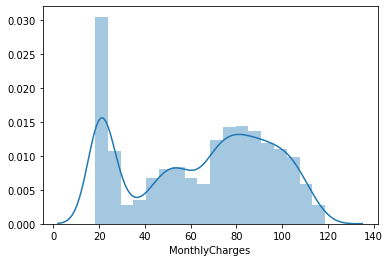

In [6]:
sns.distplot(telcom["MonthlyCharges"])

In [7]:
telcom["TotalCharges"].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

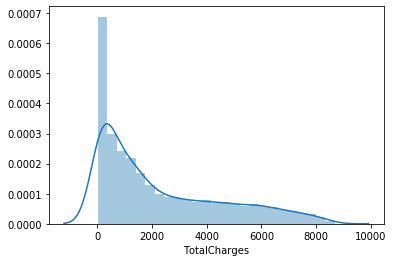

In [8]:
sns.distplot(telcom["TotalCharges"]);

In [9]:
# #show distribution with binning
# enc = KBinsDiscretizer(n_bins=10, encode='onehot')
# X_binned = enc.fit_transform(X)


#MonthlyCharges to categorical column
def mc_lab(telcom) :
    if telcom["MonthlyCharges"] <= 30 :
        return "MonthlyCharges_0-30"
    elif (telcom["MonthlyCharges"] > 30) & (telcom["MonthlyCharges"] <= 60 ):
        return "MonthlyCharges_30-60"
    elif (telcom["MonthlyCharges"] > 60) & (telcom["MonthlyCharges"] <= 90) :
        return "MonthlyCharges_60-90"
    elif (telcom["MonthlyCharges"] > 90) :
        return "MonthlyCharges_90-120"

telcom["mc_group"] = telcom.apply(lambda telcom:mc_lab(telcom), axis = 1)

#TotalCharges to categorical column
def tc_lab(telcom) :
    if telcom["TotalCharges"] <= 400 :
        return "TotalCharges_0-400"
    elif (telcom["TotalCharges"] > 400) & (telcom["TotalCharges"] <= 1400 ):
        return "TotalCharges_400-1400"
    elif (telcom["TotalCharges"] > 1400) & (telcom["TotalCharges"] <= 4000) :
        return "TotalCharges_1400-4000"
    elif (telcom["TotalCharges"] > 4000) :
        return "TotalCharges_4000-9000"
    
telcom["tc_group"] = telcom.apply(lambda telcom:tc_lab(telcom), axis = 1)

In [10]:
telcom[["MonthlyCharges", "mc_group","TotalCharges", "tc_group" ]]

,MonthlyCharges,mc_group,TotalCharges,tc_group
0,29.85,MonthlyCharges_0-30,29.85,TotalCharges_0-400
1,56.95,MonthlyCharges_30-60,1889.50,TotalCharges_1400-4000
2,53.85,MonthlyCharges_30-60,108.15,TotalCharges_0-400
3,42.30,MonthlyCharges_30-60,1840.75,TotalCharges_1400-4000
4,70.70,MonthlyCharges_60-90,151.65,TotalCharges_0-400
...,...,...,...,...
7027,84.80,MonthlyCharges_60-90,1990.50,TotalCharges_1400-4000
7028,103.20,MonthlyCharges_90-120,7362.90,TotalCharges_4000-9000
7029,29.60,MonthlyCharges_0-30,346.45,TotalCharges_0-400
7030,74.40,MonthlyCharges_60-90,306.60,TotalCharges_0-400


# <a id='4'>4. Data preprocessing</a>

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
# num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = telcom.nunique()[telcom.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    telcom[i] = le.fit_transform(telcom[i])
    
#Duplicating columns for multi value columns
telcom = pd.get_dummies(data = telcom,columns = multi_cols )

# #Scaling Numerical columns
# std = StandardScaler()
# scaled = std.fit_transform(telcom[num_cols])
# scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_telcom_og = telcom.copy()
# telcom = telcom.drop(columns = num_cols,axis = 1)
# telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")

telcom.drop(['MonthlyCharges', 'TotalCharges','tenure'], axis=1, inplace=True)


## <a id='3.7'>3.7. Variable Summary</a>

In [13]:
summary = (df_telcom_og[[i for i in df_telcom_og.columns if i not in Id_col]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Variable Summary"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)


## <a id='3.8'>3.8. Correlation Matrix</a>

In [ ]:
#correlation
correlation = telcom.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

## <a id='3.9'>3.9. Visualising data with principal components</a>

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X = telcom[[i for i in telcom.columns if i not in Id_col + target_col]]
Y = telcom[target_col + Id_col]

principal_components = pca.fit_transform(X)
pca_data = pd.DataFrame(principal_components,columns = ["PC1","PC2"])
pca_data = pca_data.merge(Y,left_index=True,right_index=True,how="left")
pca_data["Churn"] = pca_data["Churn"].replace({1:"Churn",0:"Not Churn"})

def pca_scatter(target,color) :
    tracer = go.Scatter(x = pca_data[pca_data["Churn"] == target]["PC1"] ,
                        y = pca_data[pca_data["Churn"] == target]["PC2"],
                        name = target,mode = "markers",
                        marker = dict(color = color,
                                      line = dict(width = .5),
                                      symbol =  "diamond-open"),
                        text = ("Customer Id : " + 
                                pca_data[pca_data["Churn"] == target]['customerID'])
                       )
    return tracer

layout = go.Layout(dict(title = "Visualising data with principal components",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "principal component 1",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "principal component 2",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        height = 600
                       )
                  )
trace1 = pca_scatter("Churn",'red')
trace2 = pca_scatter("Not Churn",'royalblue')
data = [trace2,trace1]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [ ]:
#Explained Variance
pca.explained_variance_ratio_

# first principal component contains 34.45% of the variance 
# and the second principal component contains 15.53% of the variance. 
# Together, the two components contain 49.98% of the information.

## <a id='3.10'>3.10. Binary variables distribution in customer attrition(Radar Chart)</a>

In [ ]:
#separating binary columns
bi_cs = telcom.nunique()[telcom.nunique() == 2].keys()
dat_rad = telcom[bi_cs]

#plotting radar chart for churn and non churn customers(binary variables)
def plot_radar(df,aggregate,title) :
    data_frame = df[df["Churn"] == aggregate] 
    data_frame_x = data_frame[bi_cs].sum().reset_index()
    data_frame_x.columns  = ["feature","yes"]
    data_frame_x["no"]    = data_frame.shape[0]  - data_frame_x["yes"]
    data_frame_x  = data_frame_x[data_frame_x["feature"] != "Churn"]
    
    #count of 1's(yes)
    trace1 = go.Scatterpolar(r = data_frame_x["yes"].values.tolist(),
                             theta = data_frame_x["feature"].tolist(),
                             fill  = "toself",name = "count of 1's",
                             mode = "markers+lines",
                             marker = dict(size = 5)
                            )
    #count of 0's(No)
    trace2 = go.Scatterpolar(r = data_frame_x["no"].values.tolist(),
                             theta = data_frame_x["feature"].tolist(),
                             fill  = "toself",name = "count of 0's",
                             mode = "markers+lines",
                             marker = dict(size = 5)
                            ) 
    layout = go.Layout(dict(polar = dict(radialaxis = dict(visible = True,
                                                           side = "counterclockwise",
                                                           showline = True,
                                                           linewidth = 2,
                                                           tickwidth = 2,
                                                           gridcolor = "white",
                                                           gridwidth = 2),
                                         angularaxis = dict(tickfont = dict(size = 10),
                                                            layer = "below traces"
                                                           ),
                                         bgcolor  = "rgb(243,243,243)",
                                        ),
                            paper_bgcolor = "rgb(243,243,243)",
                            title = title,height = 700))
    
    data = [trace2,trace1]
    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig)

#plot
plot_radar(dat_rad,1,"Churn -  Customers")
plot_radar(dat_rad,0,"Non Churn - Customers")

# <a id='5'>5. Model Building</a>
## <a id='5.1'>5.1. Baseline Model</a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold
#splitting train and test data 
train,test = train_test_split(telcom,test_size = .25 ,random_state = 111)
    
##seperating dependent and independent variables
cols    = [i for i in telcom.columns if i not in Id_col + target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

#Function attributes
#dataframe     - processed dataframe
#Algorithm     - Algorithm used 
#training_x    - predictor variables dataframe(training)
#testing_x     - predictor variables dataframe(testing)
#training_y    - target variable(training)
#training_y    - target variable(testing)
#cf - ["coefficients","features"](cooefficients for logistic 
                                 #regression,features for tree based models)

#threshold_plot - if True returns threshold plot for model
    
def telecom_churn_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    if   cf == "coefficients" :
        coefficients  = pd.DataFrame(algorithm.coef_.ravel())
    elif cf == "features" :
        coefficients  = pd.DataFrame(algorithm.feature_importances_)
        
    column_df     = pd.DataFrame(cols)
    coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot coeffs
    trace4 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Picnic",
                                  line = dict(width = .6,color = "black")))
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic',
                                            'Feature Importances'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    fig.append_trace(trace4,2,1)
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()
        
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

telecom_churn_prediction(logit,train_X,test_X,train_Y,test_Y,
                         cols,"coefficients",threshold_plot = True)

## <a id='5.2'>5.2. Synthetic Minority Oversampling TEchnique (SMOTE)</a>
* Randomly pick a point from the minority class.
* Compute the k-nearest neighbors (for some pre-specified k) for this point.
* Add k new points somewhere between the chosen point and each of its neighbors

In [ ]:
from imblearn.over_sampling import SMOTE

cols    = [i for i in telcom.columns if i not in Id_col+target_col]

smote_X = telcom[cols]
smote_Y = telcom[target_col]

#Split train and test data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,
                                                                         test_size = .25 ,
                                                                         random_state = 111)

#oversampling minority class using smote
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_sample(smote_train_X,smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=target_col)
###



logit_smote = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

telecom_churn_prediction(logit_smote,os_smote_X,test_X,os_smote_Y,test_Y,
                         cols,"coefficients",threshold_plot = True)


## <a id='5.3'>5.3. Recursive Feature Elimination</a>
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [ ]:
from sklearn.feature_selection import RFE

logit = LogisticRegression()

rfe = RFE(logit,10)
rfe = rfe.fit(os_smote_X,os_smote_Y.values.ravel())

rfe.support_
rfe.ranking_

#identified columns Recursive Feature Elimination
idc_rfe = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : [i for i in telcom.columns if i not in Id_col + target_col],
                       "ranking" : rfe.ranking_,
                      })
cols = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()


#separating train and test data
train_rf_X = os_smote_X[cols]
train_rf_Y = os_smote_Y
test_rf_X  = test[cols]
test_rf_Y  = test[target_col]

logit_rfe = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
#applying model
telecom_churn_prediction(logit_rfe,train_rf_X,test_rf_X,train_rf_Y,test_rf_Y,
                         cols,"coefficients",threshold_plot = True)

tab_rk = ff.create_table(idc_rfe)
py.iplot(tab_rk)

## <a id='5.4'>5.4. Univariate Selection</a>
* Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
* uses the chi squared (chi^2) statistical test for non-negative features to select the best features

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

#select columns
cols = [i for i in telcom.columns if i not in Id_col + target_col ]

#dataframe with non negative values
df_x = df_telcom_og[cols]
df_y = df_telcom_og[target_col]

#fit model with k= 3
select = SelectKBest(score_func = chi2,k = 3)
fit    = select.fit(df_x,df_y)

#Summerize scores
print ("scores")
print (fit.scores_)
print ("P - Values")
print (fit.pvalues_)

#create dataframe
score = pd.DataFrame({"features":cols,"scores":fit.scores_,"p_values":fit.pvalues_ })
score = score.sort_values(by = "scores" ,ascending =False)


#createing new label for categorical and numerical columns
score["feature_type"] = np.where(score["features"].isin(num_cols),"Numerical","Categorical")

#plot
trace  = go.Scatter(x = score[score["feature_type"] == "Categorical"]["features"],
                    y = score[score["feature_type"] == "Categorical"]["scores"],
                    name = "Categorial",mode = "lines+markers",
                    marker = dict(color = "red",
                                  line = dict(width =1))
                   )

trace1 = go.Bar(x = score[score["feature_type"] == "Numerical"]["features"],
                y = score[score["feature_type"] == "Numerical"]["scores"],name = "Numerical",
                marker = dict(color = "royalblue",
                              line = dict(width =1)),
                xaxis = "x2",yaxis = "y2"
               )
layout = go.Layout(dict(title = "Scores for Categorical & Numerical features",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     tickfont = dict(size =10),
                                     domain=[0, 0.7],
                                     tickangle = 90,zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "scores",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(b=200),
                        xaxis2=dict(domain=[0.8, 1],tickangle = 90,
                                    gridcolor = 'rgb(255, 255, 255)'),
                        yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                        )
                  )

data=[trace,trace1]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

## <a id='5.5'>5.5. Decision Tree Visualization</a>
* Using top three numerical features

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG,display

#top 3 categorical features
features_cat  = score[score["feature_type"] == "Categorical"]["features"][:3].tolist()

#top 3 numerical features
features_num  = score[score["feature_type"] == "Numerical"]["features"][:3].tolist()


#Function attributes
#columns        - selected columns
#maximum_depth  - depth of tree
#criterion_type - ["gini" or "entropy"]
#split_type     - ["best" or "random"]
#Model Performance - True (gives model output)

def plot_decision_tree(columns,maximum_depth,criterion_type,
                       split_type,model_performance = None) :
    
    #separating dependent and in dependent variables
    dtc_x = df_x[columns]
    dtc_y = df_y[target_col]
    
    #model
    dt_classifier = DecisionTreeClassifier(max_depth = maximum_depth,
                                           splitter  = split_type,
                                           criterion = criterion_type,
                                          )
    dt_classifier.fit(dtc_x,dtc_y)
    
    #plot decision tree
    graph = Source(tree.export_graphviz(dt_classifier,out_file=None,
                                        rounded=True,proportion = False,
                                        feature_names = columns, 
                                        precision  = 2,
                                        class_names=["Not churn","Churn"],
                                        filled = True                         
                                       )
                  )
    
    #model performance
    if model_performance == True :
        telecom_churn_prediction(dt_classifier,
                                 dtc_x,test_X[columns],
                                 dtc_y,test_Y,
                                 columns,"features",threshold_plot = True)
    display(graph)
    
plot_decision_tree(features_num,3,"gini","best")

### * Using top three categorical features

In [ ]:
features_cat

In [ ]:
plot_decision_tree(features_cat,3,"entropy","best",
                   model_performance = True ,)

In [ ]:
#using contract,tenure and paperless billing variables
columns = ['tenure','Contract_Month-to-month', 'PaperlessBilling',
           'Contract_One year', 'Contract_Two year']

plot_decision_tree(columns,3,"gini","best",model_performance= True)

## <a id='5.6'>5.6. KNN Classifier</a>
* Applying knn algorithm to smote  oversampled data.


In [ ]:
def telecom_churn_prediction_alg(algorithm,training_x,testing_x,
                                 training_y,testing_y,threshold_plot = True) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy Score   : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc)
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
     
    #plot roc curve
    trace1 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2),
                       )
    trace2 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot confusion matrix
    trace3 = go.Heatmap(z = conf_matrix ,x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Blues",name = "matrix",
                        xaxis = "x2",yaxis = "y2"
                       )
    
    layout = go.Layout(dict(title="Model performance" ,
                            autosize = False,height = 500,width = 800,
                            showlegend = False,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(title = "false positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         domain=[0, 0.6],
                                         ticklen=5,gridwidth=2),
                            yaxis = dict(title = "true positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         zerolinewidth=1,
                                         ticklen=5,gridwidth=2),
                            margin = dict(b=200),
                            xaxis2=dict(domain=[0.7, 1],tickangle = 90,
                                        gridcolor = 'rgb(255, 255, 255)'),
                            yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                           )
                  )
    data = [trace1,trace2,trace3]
    fig = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()

    
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
telecom_churn_prediction_alg(knn,os_smote_X,test_X,
                             os_smote_Y,test_Y,threshold_plot = True)

## <a id='5.7'>5.7. Vizualising a decision tree from random forest classifier</a>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#function attributes
#columns  - column used
#nf_estimators   - The number of trees in the forest.
#estimated_tree  - tree number to be displayed
#maximum_depth   - depth of the tree
#criterion_type  - split criterion type ["gini" or "entropy"]
#Model performance - prints performance of model

def plot_tree_randomforest(columns,nf_estimators,
                           estimated_tree,maximum_depth,
                           criterion_type,model_performance = None) :
    
    dataframe = df_telcom_og[columns + target_col].copy()
    
    #train and test datasets
    rf_x     = dataframe[[i for i in columns if i not in target_col]]
    rf_y     = dataframe[target_col]
    
    #random forest classifier
    rfc   = RandomForestClassifier(n_estimators = nf_estimators,
                                   max_depth = maximum_depth,
                                   criterion = criterion_type,
                                  )
    rfc.fit(rf_x,rf_y)
    
    estimated_tree = rfc.estimators_[estimated_tree]
    
    graph = Source(tree.export_graphviz(estimated_tree,out_file=None,
                                        rounded=True,proportion = False,
                            feature_names = columns, 
                            precision  = 2,
                            class_names=["Not churn","Churn"],
                            filled = True))
    display(graph)
    
    #model performance
    if model_performance == True :
        telecom_churn_prediction(rfc,
                                 rf_x,test_X[columns],
                                 rf_y,test_Y,
                                 columns,"features",threshold_plot = True)
        

cols1 = [ i for i in train_X.columns if i not in target_col + Id_col] 
plot_tree_randomforest(cols1,100,99,3,"entropy",True)

## <a id='5.8'>5.8. A random forest classifier.</a>
* A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement .
* Below are the trees produced by random forest model with 10 estimated trees with maximum depth of three  for each tree. Each tree produced is slightly different from other.

In [ ]:
#making 10 trees with random forest.
n = np.arange(0,10).tolist()
cols1 = [ i for i in train_X.columns if i not in target_col + Id_col] 
for i in n :
    plot_tree_randomforest(cols1,10,i,3,"entropy",model_performance=False)

In [ ]:
#making 10 trees with random forest for columns 
#selected from recursive feature elimination

n = np.arange(0,10).tolist()
cols = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist() 
for i in n :
    plot_tree_randomforest(cols,10,i,3,"gini",model_performance=False)


## <a id='5.9'>5.9. Gaussian Naive Bayes.</a>

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=None)

telecom_churn_prediction_alg(gnb,os_smote_X,test_X,os_smote_Y,test_Y)

## <a id='5.14'>5.14. Bayesian Network</a>

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold

df_telcom_og.drop(['gender', 'tenure', 'MonthlyCharges', 'TotalCharges'],axis=1,inplace=True)
#splitting train and test data 
train,test = train_test_split(df_telcom_og,test_size = .25 ,random_state = 111)
    
##seperating dependent and independent variables
cols    = [i for i in df_telcom_og.columns if i not in Id_col + target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

trainbn = pd.concat([train_X, train_Y], axis=1)

In [18]:
test_Y.head(10)

,Churn
3464,0
354,1
2326,0
2921,0
5391,0
1413,0
1781,1
1141,0
4004,0
3841,0


In [19]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator

# network construction

bn = BayesianModel([('Partner','Dependents'),     
        ('SeniorCitizen','Dependents'),
        
        ('Dependents','PhoneService'),
        ('PhoneService','MultipleLines_No'),
        ('PhoneService','MultipleLines_No phone service'),
        ('PhoneService','MultipleLines_Yes'),
        ('PhoneService','DeviceProtection'),
        ('PhoneService','TechSupport'),
        
        ('PhoneService','tenure_group_Tenure_0-12'),
        ('InternetService_DSL','tenure_group_Tenure_0-12'),
        ('InternetService_Fiber optic','tenure_group_Tenure_0-12'),
        ('InternetService_No','tenure_group_Tenure_0-12'),
        ('PhoneService','tenure_group_Tenure_12-24'),
        ('InternetService_DSL','tenure_group_Tenure_12-24'),
        ('InternetService_Fiber optic','tenure_group_Tenure_12-24'),
        ('InternetService_No','tenure_group_Tenure_12-24'),
        ('PhoneService','tenure_group_Tenure_24-48'),
        ('InternetService_DSL','tenure_group_Tenure_24-48'),
        ('InternetService_Fiber optic','tenure_group_Tenure_24-48'),
        ('InternetService_No','tenure_group_Tenure_24-48'),
        ('PhoneService','tenure_group_Tenure_48-60'),
        ('InternetService_DSL','tenure_group_Tenure_48-60'),
        ('InternetService_Fiber optic','tenure_group_Tenure_48-60'),
        ('InternetService_No','tenure_group_Tenure_48-60'),
        ('PhoneService','tenure_group_Tenure_gt_60'),
        ('InternetService_DSL','tenure_group_Tenure_gt_60'),
        ('InternetService_Fiber optic','tenure_group_Tenure_gt_60'),
        ('InternetService_No','tenure_group_Tenure_gt_60'),
        
        ('tenure_group_Tenure_0-12','Churn'),
        ('tenure_group_Tenure_12-24','Churn'),
        ('tenure_group_Tenure_24-48','Churn'),
        ('tenure_group_Tenure_48-60','Churn'),
        ('tenure_group_Tenure_gt_60','Churn'),
                    
        ('MultipleLines_No','mc_group_MonthlyCharges_0-30'),
        ('MultipleLines_No phone service','mc_group_MonthlyCharges_0-30'),
        ('MultipleLines_Yes','mc_group_MonthlyCharges_0-30'),
        ('DeviceProtection','mc_group_MonthlyCharges_0-30'),
        ('TechSupport','mc_group_MonthlyCharges_0-30'),
        ('MultipleLines_No','mc_group_MonthlyCharges_30-60'),
        ('MultipleLines_No phone service','mc_group_MonthlyCharges_30-60'),
        ('MultipleLines_Yes','mc_group_MonthlyCharges_30-60'),
        ('DeviceProtection','mc_group_MonthlyCharges_30-60'),
        ('TechSupport','mc_group_MonthlyCharges_30-60'),
        ('MultipleLines_No','mc_group_MonthlyCharges_60-90'),
        ('MultipleLines_No phone service','mc_group_MonthlyCharges_60-90'),
        ('MultipleLines_Yes','mc_group_MonthlyCharges_60-90'),
        ('DeviceProtection','mc_group_MonthlyCharges_60-90'),
        ('TechSupport','mc_group_MonthlyCharges_60-90'),
        ('MultipleLines_No','mc_group_MonthlyCharges_90-120'),
        ('MultipleLines_No phone service','mc_group_MonthlyCharges_90-120'),
        ('MultipleLines_Yes','mc_group_MonthlyCharges_90-120'),
        ('DeviceProtection','mc_group_MonthlyCharges_90-120'),
        ('TechSupport','mc_group_MonthlyCharges_90-120'),
                    
        
        ('Dependents','InternetService_DSL'),
        ('Dependents','InternetService_Fiber optic'),
        ('Dependents','InternetService_No'),
                    
        ('InternetService_DSL','DeviceProtection'),
        ('InternetService_Fiber optic','DeviceProtection'),
        ('InternetService_No','DeviceProtection'),
        ('InternetService_DSL','TechSupport'),
        ('InternetService_Fiber optic','TechSupport'),
        ('InternetService_No','TechSupport'),
                              
        ('InternetService_DSL','StreamingTV'),
        ('InternetService_Fiber optic','StreamingTV'),
        ('InternetService_No','StreamingTV'),
        ('InternetService_DSL','StreamingMovies'),
        ('InternetService_Fiber optic','StreamingMovies'),
        ('InternetService_No','StreamingMovies'),
        ('InternetService_DSL','OnlineSecurity'),
        ('InternetService_Fiber optic','OnlineSecurity'),
        ('InternetService_No','OnlineSecurity'),
        ('InternetService_DSL','OnlineBackup'),
        ('InternetService_Fiber optic','OnlineBackup'),
        ('InternetService_No','OnlineBackup'),
                    
        ('StreamingTV','mc_group_MonthlyCharges_0-30'),
        ('StreamingMovies','mc_group_MonthlyCharges_0-30'),
        ('OnlineSecurity','mc_group_MonthlyCharges_0-30'),
        ('OnlineBackup','mc_group_MonthlyCharges_0-30'),
        ('StreamingTV','mc_group_MonthlyCharges_30-60'),
        ('StreamingMovies','mc_group_MonthlyCharges_30-60'),
        ('OnlineSecurity','mc_group_MonthlyCharges_30-60'),
        ('OnlineBackup','mc_group_MonthlyCharges_30-60'),
        ('StreamingTV','mc_group_MonthlyCharges_60-90'),
        ('StreamingMovies','mc_group_MonthlyCharges_60-90'),
        ('OnlineSecurity','mc_group_MonthlyCharges_60-90'),
        ('OnlineBackup','mc_group_MonthlyCharges_60-90'),
        ('StreamingTV','mc_group_MonthlyCharges_90-120'),
        ('StreamingMovies','mc_group_MonthlyCharges_90-120'),
        ('OnlineSecurity','mc_group_MonthlyCharges_90-120'),
        ('OnlineBackup','mc_group_MonthlyCharges_90-120'),

                    
        ('SeniorCitizen','PaperlessBilling'),
        ('PaperlessBilling','PaymentMethod_Bank transfer (automatic)'),
        ('PaperlessBilling','PaymentMethod_Credit card (automatic)'),
        ('PaperlessBilling','PaymentMethod_Electronic check'),
        ('PaperlessBilling','PaymentMethod_Mailed check'),
        ('PaymentMethod_Bank transfer (automatic)','Contract_Month-to-month'),                    
        ('PaymentMethod_Bank transfer (automatic)','Contract_One year'),
        ('PaymentMethod_Bank transfer (automatic)','Contract_Two year'),
        ('PaymentMethod_Credit card (automatic)','Contract_Month-to-month'),                    
        ('PaymentMethod_Credit card (automatic)','Contract_One year'),
        ('PaymentMethod_Credit card (automatic)','Contract_Two year'),
        ('PaymentMethod_Electronic check','Contract_Month-to-month'),                    
        ('PaymentMethod_Electronic check','Contract_One year'),
        ('PaymentMethod_Electronic check','Contract_Two year'),
        ('PaymentMethod_Mailed check','Contract_Month-to-month'),                    
        ('PaymentMethod_Mailed check','Contract_One year'),
        ('PaymentMethod_Mailed check','Contract_Two year'),
        ('Contract_Month-to-month','mc_group_MonthlyCharges_0-30'),
        ('Contract_One year','mc_group_MonthlyCharges_0-30'),
        ('Contract_Two year','mc_group_MonthlyCharges_0-30'),
        ('Contract_Month-to-month','mc_group_MonthlyCharges_30-60'),
        ('Contract_One year','mc_group_MonthlyCharges_30-60'),
        ('Contract_Two year','mc_group_MonthlyCharges_30-60'),
        ('Contract_Month-to-month','mc_group_MonthlyCharges_60-90'),
        ('Contract_One year','mc_group_MonthlyCharges_60-90'),
        ('Contract_Two year','mc_group_MonthlyCharges_60-90'),
        ('Contract_Month-to-month','mc_group_MonthlyCharges_90-120'),
        ('Contract_One year','mc_group_MonthlyCharges_90-120'),
        ('Contract_Two year','mc_group_MonthlyCharges_90-120'), 
                    
        ('mc_group_MonthlyCharges_0-30','tc_group_TotalCharges_0-400'),
        ('mc_group_MonthlyCharges_30-60','tc_group_TotalCharges_0-400'),
        ('mc_group_MonthlyCharges_60-90','tc_group_TotalCharges_0-400'),
        ('mc_group_MonthlyCharges_90-120','tc_group_TotalCharges_0-400'),
        ('mc_group_MonthlyCharges_0-30','tc_group_TotalCharges_1400-4000'),
        ('mc_group_MonthlyCharges_30-60','tc_group_TotalCharges_1400-4000'),
        ('mc_group_MonthlyCharges_60-90','tc_group_TotalCharges_1400-4000'),
        ('mc_group_MonthlyCharges_90-120','tc_group_TotalCharges_1400-4000'),
        ('mc_group_MonthlyCharges_0-30','tc_group_TotalCharges_400-1400'),
        ('mc_group_MonthlyCharges_30-60','tc_group_TotalCharges_400-1400'),
        ('mc_group_MonthlyCharges_60-90','tc_group_TotalCharges_400-1400'),
        ('mc_group_MonthlyCharges_90-120','tc_group_TotalCharges_400-1400'),
        ('mc_group_MonthlyCharges_0-30','tc_group_TotalCharges_4000-9000'),
        ('mc_group_MonthlyCharges_30-60','tc_group_TotalCharges_4000-9000'),
        ('mc_group_MonthlyCharges_60-90','tc_group_TotalCharges_4000-9000'),
        ('mc_group_MonthlyCharges_90-120','tc_group_TotalCharges_4000-9000'),
        ('tc_group_TotalCharges_0-400','Churn'),
        ('tc_group_TotalCharges_400-1400','Churn'),
        ('tc_group_TotalCharges_1400-4000','Churn'),
        ('tc_group_TotalCharges_4000-9000','Churn')      
        ])

bn.fit(trainbn, estimator=MaximumLikelihoodEstimator)


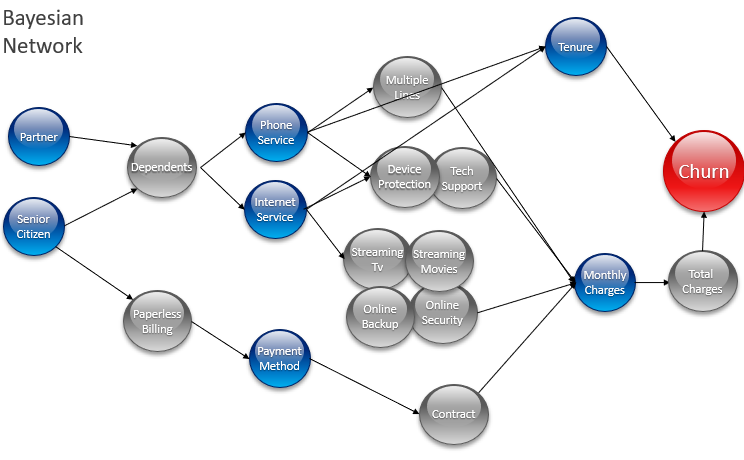

In [20]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(bn)

def get_query_result(infer, X_test):
    result = []
    variables = X_test.columns.tolist()[:-1] # [:-1] to exclude last Var38 in this case
    for i in range(20): #len(X_test.values)): --- using range(5) to limit number of queries
        q = infer.query(variables=['Churn'], evidence=dict(zip(variables,list(map(int,X_test.values[i].tolist()))[:-1]))) # [:-1] to exclude last Var38 in this case
        if q.values[0] >= 0.5:
            result.append(0)
        else:
            result.append(1)
        print(q)
    return result

# infer.query(['Churn'])
y_pred = get_query_result(infer, test_X)
y_pred
# telecom_churn_prediction_alg(bn,os_smote_X,test_X,os_smote_Y,test_Y,threshold_plot = True)

Eliminating: tc_group_TotalCharges_4000-9000: 100%|█████████████████████████████████████| 1/1 [00:00<00:00, 500.57it/s]


+----------+--------------+
| Churn    |   phi(Churn) |
+==========+==============+
| Churn(0) |       0.5093 |
+----------+--------------+
| Churn(1) |       0.4907 |
+----------+--------------+


Eliminating: tc_group_TotalCharges_4000-9000: 100%|████████████████████████████████████| 1/1 [00:00<00:00, 1002.46it/s]


+----------+--------------+
| Churn    |   phi(Churn) |
+==========+==============+
| Churn(0) |       0.7730 |
+----------+--------------+
| Churn(1) |       0.2270 |
+----------+--------------+


Eliminating: tc_group_TotalCharges_4000-9000: 100%|█████████████████████████████████████| 1/1 [00:00<00:00, 334.10it/s]


+----------+--------------+
| Churn    |   phi(Churn) |
+==========+==============+
| Churn(0) |       0.9615 |
+----------+--------------+
| Churn(1) |       0.0385 |
+----------+--------------+


Eliminating: tc_group_TotalCharges_4000-9000: 100%|█████████████████████████████████████| 1/1 [00:00<00:00, 333.68it/s]


+----------+--------------+
| Churn    |   phi(Churn) |
+==========+==============+
| Churn(0) |       0.7586 |
+----------+--------------+
| Churn(1) |       0.2414 |
+----------+--------------+


Eliminating: tc_group_TotalCharges_4000-9000: 100%|█████████████████████████████████████| 1/1 [00:00<00:00, 501.23it/s]


+----------+--------------+
| Churn    |   phi(Churn) |
+==========+==============+
| Churn(0) |       0.6953 |
+----------+--------------+
| Churn(1) |       0.3047 |
+----------+--------------+


Eliminating: tc_group_TotalCharges_4000-9000: 100%|█████████████████████████████████████| 1/1 [00:00<00:00, 501.35it/s]


+----------+--------------+
| Churn    |   phi(Churn) |
+==========+==============+
| Churn(0) |       0.6003 |
+----------+--------------+
| Churn(1) |       0.3997 |
+----------+--------------+


Eliminating: tc_group_TotalCharges_4000-9000: 100%|█████████████████████████████████████| 1/1 [00:00<00:00, 501.23it/s]


+----------+--------------+
| Churn    |   phi(Churn) |
+==========+==============+
| Churn(0) |       0.6953 |
+----------+--------------+
| Churn(1) |       0.3047 |
+----------+--------------+


Eliminating: tc_group_TotalCharges_4000-9000: 100%|█████████████████████████████████████| 1/1 [00:00<00:00, 250.51it/s]


+----------+--------------+
| Churn    |   phi(Churn) |
+==========+==============+
| Churn(0) |       0.6953 |
+----------+--------------+
| Churn(1) |       0.3047 |
+----------+--------------+


Eliminating: tc_group_TotalCharges_4000-9000: 100%|█████████████████████████████████████| 1/1 [00:00<00:00, 500.57it/s]


+----------+--------------+
| Churn    |   phi(Churn) |
+==========+==============+
| Churn(0) |       0.7762 |
+----------+--------------+
| Churn(1) |       0.2238 |
+----------+--------------+


Eliminating: tc_group_TotalCharges_4000-9000: 100%|█████████████████████████████████████| 1/1 [00:00<00:00, 250.68it/s]


+----------+--------------+
| Churn    |   phi(Churn) |
+==========+==============+
| Churn(0) |       0.5337 |
+----------+--------------+
| Churn(1) |       0.4663 |
+----------+--------------+


Eliminating: tc_group_TotalCharges_4000-9000: 100%|█████████████████████████████████████| 1/1 [00:00<00:00, 501.83it/s]


+----------+--------------+
| Churn    |   phi(Churn) |
+==========+==============+
| Churn(0) |       0.8668 |
+----------+--------------+
| Churn(1) |       0.1332 |
+----------+--------------+


Eliminating: tc_group_TotalCharges_4000-9000: 100%|█████████████████████████████████████| 1/1 [00:00<00:00, 403.84it/s]


+----------+--------------+
| Churn    |   phi(Churn) |
+==========+==============+
| Churn(0) |       0.5337 |
+----------+--------------+
| Churn(1) |       0.4663 |
+----------+--------------+


Eliminating: tc_group_TotalCharges_4000-9000: 100%|█████████████████████████████████████| 1/1 [00:00<00:00, 500.63it/s]


+----------+--------------+
| Churn    |   phi(Churn) |
+==========+==============+
| Churn(0) |       0.5980 |
+----------+--------------+
| Churn(1) |       0.4020 |
+----------+--------------+


Eliminating: tc_group_TotalCharges_4000-9000: 100%|█████████████████████████████████████| 1/1 [00:00<00:00, 501.41it/s]


+----------+--------------+
| Churn    |   phi(Churn) |
+==========+==============+
| Churn(0) |       0.5463 |
+----------+--------------+
| Churn(1) |       0.4537 |
+----------+--------------+


Eliminating: tc_group_TotalCharges_4000-9000: 100%|█████████████████████████████████████| 1/1 [00:00<00:00, 503.03it/s]


+----------+--------------+
| Churn    |   phi(Churn) |
+==========+==============+
| Churn(0) |       0.6707 |
+----------+--------------+
| Churn(1) |       0.3293 |
+----------+--------------+


Eliminating: tc_group_TotalCharges_4000-9000: 100%|█████████████████████████████████████| 1/1 [00:00<00:00, 501.23it/s]


+----------+--------------+
| Churn    |   phi(Churn) |
+==========+==============+
| Churn(0) |       0.7730 |
+----------+--------------+
| Churn(1) |       0.2270 |
+----------+--------------+


Eliminating: tc_group_TotalCharges_4000-9000: 100%|█████████████████████████████████████| 1/1 [00:00<00:00, 501.53it/s]


+----------+--------------+
| Churn    |   phi(Churn) |
+==========+==============+
| Churn(0) |       0.7541 |
+----------+--------------+
| Churn(1) |       0.2459 |
+----------+--------------+


Eliminating: tc_group_TotalCharges_4000-9000: 100%|█████████████████████████████████████| 1/1 [00:00<00:00, 501.05it/s]


+----------+--------------+
| Churn    |   phi(Churn) |
+==========+==============+
| Churn(0) |       0.9615 |
+----------+--------------+
| Churn(1) |       0.0385 |
+----------+--------------+


Eliminating: tc_group_TotalCharges_4000-9000: 100%|█████████████████████████████████████| 1/1 [00:00<00:00, 500.99it/s]


+----------+--------------+
| Churn    |   phi(Churn) |
+==========+==============+
| Churn(0) |       0.5341 |
+----------+--------------+
| Churn(1) |       0.4659 |
+----------+--------------+


Eliminating: tc_group_TotalCharges_4000-9000: 100%|█████████████████████████████████████| 1/1 [00:00<00:00, 501.29it/s]


+----------+--------------+
| Churn    |   phi(Churn) |
+==========+==============+
| Churn(0) |       0.9827 |
+----------+--------------+
| Churn(1) |       0.0173 |
+----------+--------------+


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# <a id='6'>6. Model Performances</a>
## <a id='6.1'>6.1. model performance metrics</a>

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

#gives model report in dataframe
def model_report(model,training_x,testing_x,training_y,testing_y,name) :
    model.fit(training_x,training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    roc_auc      = roc_auc_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    kappa_metric = cohen_kappa_score(testing_y,predictions)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score],
                       "Area_under_curve": [roc_auc],
                       "Kappa_metric"    : [kappa_metric],
                      })
    return df

#outputs for every model
model1 = model_report(logit,train_X,test_X,train_Y,test_Y,
                      "Logistic Regression(Baseline_model)")
model2 = model_report(logit_smote,os_smote_X,test_X,os_smote_Y,test_Y,
                      "Logistic Regression(SMOTE)")
model3 = model_report(logit_rfe,train_rf_X,test_rf_X,train_rf_Y,test_rf_Y,
                      "Logistic Regression(RFE)")
decision_tree = DecisionTreeClassifier(max_depth = 9,
                                       random_state = 123,
                                       splitter  = "best",
                                       criterion = "gini",
                                      )
model4 = model_report(decision_tree,train_X,test_X,train_Y,test_Y,
                      "Decision Tree")
model5 = model_report(knn,os_smote_X,test_X,os_smote_Y,test_Y,
                      "KNN Classifier")
rfc = RandomForestClassifier(n_estimators = 1000,
                             random_state = 123,
                             max_depth = 9,
                             criterion = "gini")
model6 = model_report(rfc,train_X,test_X,train_Y,test_Y,
                      "Random Forest Classifier")
model7 = model_report(gnb,os_smote_X,test_X,os_smote_Y,test_Y,
                      "Naive Bayes")
model8 = model_report(svc_lin,os_smote_X,test_X,os_smote_Y,test_Y,
                      "SVM Classifier Linear")
model9 = model_report(svc_rbf,os_smote_X,test_X,os_smote_Y,test_Y,
                      "SVM Classifier RBF")
model10 = model_report(lgbm_c,os_smote_X,test_X,os_smote_Y,test_Y,
                      "LGBM Classifier")
model11 = model_report(xgc,os_smote_X,test_X,os_smote_Y,test_Y,
                      "XGBoost Classifier")

#concat all models
model_performances = pd.concat([model1,model2,model3,
                                model4,model5,model6,
                                model7,model8,model9,
                                model10,model11],axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index",axis =1)

table  = ff.create_table(np.round(model_performances,4))

py.iplot(table)

## <a id='6.2'>6.2. Compare model metrics</a>

In [ ]:
model_performances
def output_tracer(metric,color) :
    tracer = go.Bar(y = model_performances["Model"] ,
                    x = model_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )


trace1  = output_tracer("Accuracy_score","#6699FF")
trace2  = output_tracer('Recall_score',"red")
trace3  = output_tracer('Precision',"#33CC99")
trace4  = output_tracer('f1_score',"lightgrey")
trace5  = output_tracer('Kappa_metric',"#FFCC99")

data = [trace1,trace2,trace3,trace4,trace5]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)



## <a id='6.3'>6.3. Confusion matrices for models</a>

In [ ]:
lst    = [logit,logit_smote,decision_tree,knn,rfc,
          gnb,svc_lin,svc_rbf,lgbm_c,xgc]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)',
          'Decision Tree','KNN Classifier','Random Forest Classifier',"Naive Bayes",
          'SVM Classifier Linear','SVM Classifier RBF', 'LGBM Classifier',
          'XGBoost Classifier']

fig = plt.figure(figsize=(13,15))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,3,j+1)
    predictions = i.predict(test_X)
    conf_matrix = confusion_matrix(predictions,test_Y)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["not churn","churn"],
                yticklabels=["not churn","churn"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
    plt.title(k,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)

## <a id='6.4'>6.4. ROC - Curves  for models</a>

In [ ]:
lst    = [logit,logit_smote,decision_tree,knn,rfc,
          gnb,svc_lin,svc_rbf,lgbm_c,xgc]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)',
          'Decision Tree','KNN Classifier','Random Forest Classifier',"Naive Bayes",
          'SVM Classifier Linear','SVM Classifier RBF', 'LGBM Classifier',
          'XGBoost Classifier']

plt.style.use("dark_background")
fig = plt.figure(figsize=(12,16))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(test_X)
    predictions   = i.predict(test_X)
    fpr,tpr,thresholds = roc_curve(test_Y,probabilities[:,1])
    plt.plot(fpr,tpr,linestyle = "dotted",
             color = "royalblue",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(test_Y,predictions),3)))
    plt.plot([0,1],[0,1],linestyle = "dashed",
             color = "orangered",linewidth = 1.5)
    plt.fill_between(fpr,tpr,alpha = .4)
    plt.fill_between([0,1],[0,1],color = "k")
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xticks(np.arange(0,1,.3))
    plt.yticks(np.arange(0,1,.3))

## <a id='6.5'>6.5. Precision recall curves</a>

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score


lst    = [logit,logit_smote,decision_tree,knn,rfc,
          gnb,svc_lin,svc_rbf,lgbm_c,xgc]

length = len(lst)

mods   = ['Logistic Regression(Baseline_model)','Logistic Regression(SMOTE)',
          'Decision Tree','KNN Classifier','Random Forest Classifier',"Naive Bayes",
          'SVM Classifier Linear','SVM Classifier RBF', 'LGBM Classifier',
          'XGBoost Classifier']

fig = plt.figure(figsize=(13,17))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    
    qx = plt.subplot(4,3,j+1)
    probabilities = i.predict_proba(test_X)
    predictions   = i.predict(test_X)
    recall,precision,thresholds = precision_recall_curve(test_Y,probabilities[:,1])
    plt.plot(recall,precision,linewidth = 1.5,
             label = ("avg_pcn : " + 
                      str(np.around(average_precision_score(test_Y,predictions),3))))
    plt.plot([0,1],[0,0],linestyle = "dashed")
    plt.fill_between(recall,precision,alpha = .2)
    plt.legend(loc = "lower left",
               prop = {"size" : 10})
    qx.set_facecolor("k")
    plt.grid(True,alpha = .15)
    plt.title(k,color = "b")
    plt.xlabel("recall",fontsize =7)
    plt.ylabel("precision",fontsize =7)
    plt.xlim([0.25,1])
    plt.yticks(np.arange(0,1,.3))
    